In [3]:
# Student Name: David de Andres Hernandez
# Matriculation Number: 3755457

# Discrete Event Simulator (DES) - Part 2

# Simulation

In [1]:
import part2_simstudy as p2

### Task 2.7.1: Systems with Different Queue Capacity I

*Create plots of the mean waiting times of a packet and the mean queue length (buffer fill status). Perform this simulation for queue capacity S = 5, 6, 7 and simulation time of 100s. Run your simulation 1000 times and add the averages to respective histograms. Plot your histograms. You should have three histograms for the waiting times and three for the queue lengths. For easier comparison, you can also display the results for the different queue capacities in one plot only (for the mean queue length, you can use the side-by-side plot for better comparison). Think of a reasonable number of bins. Hint: You can and should use additional configuration parameters defined in class SimParam, like S_VALUES. For better performance you can also temporarily comment all unused counters in class CounterCollection.*


The mean queue length for S=5 is 2.54220724
The variance of the queue length for S=5 is 0.3325934148726551
The mean waiting time for S=5 is 1297.80188109319s
The mean queue length for S=6 is 2.9936589700000003
The variance of the queue length for S=6 is 0.5659636416436828
The mean waiting time for S=6 is 1514.8651966675557s
The mean queue length for S=7 is 3.4432574799999998
The variance of the queue length for S=7 is 0.9590296954673169
The mean waiting time for S=7 is 1739.6119499479964s


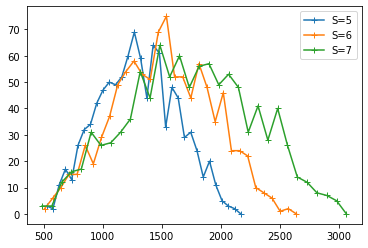

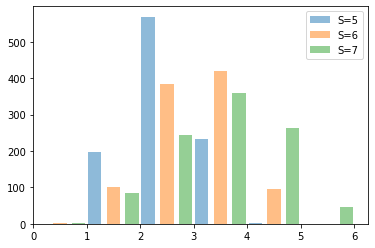

In [2]:
p2.task_2_7_1()

### Task 2.7.2: Systems with Different Queue Capacity II

*Create the same plots for a simulation time of 1000s. Still, simulation has to run 1000 times.*

The mean queue length for S=5 is 2.7442226329999997
The variance of the queue length for S=5 is 0.03590466494819851
The mean waiting time for S=5 is 1405.7891118473672s
The mean queue length for S=6 is 3.343598086
The variance of the queue length for S=6 is 0.06748105604432493
The mean waiting time for S=6 is 1703.497942425054s
The mean queue length for S=7 is 3.970487639
The variance of the queue length for S=7 is 0.12463432940770038
The mean waiting time for S=7 is 2017.1230572226839s


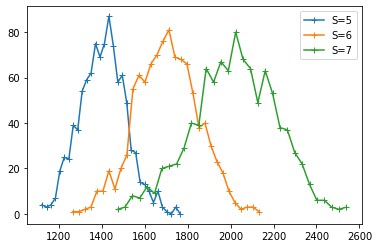

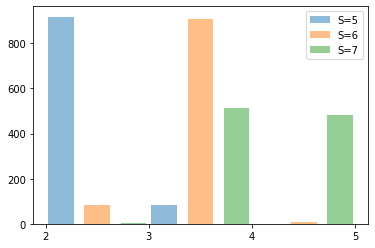

In [3]:
p2.task_2_7_2()

#  Analysis and General Questions

### Task 2.8.1: Systems with Different Queue Capacity

*Describe the observations, that are highlighted by the plots from tasks 2.7.1 and 2.7.2. What can you observe, when you increase the queue capacity? What are the differences between a simulation time of 100s and 1000s, especially regarding the variance? Why does this effect happen?*

As the queue length increases, less packets are dropped. This translates into larger waiting times (packets wait more steps in the queues) which translates into a higher variance. In other words, as the queue length increases, so does the variance of the average waiting time. On the opposite, the variance of the average queue length decreases with the longer simulation times.

The longer simulation times influence the mean of the pdfs as due to the law of large numbers, the average becomes more precise. Having longer waiting times due to the longer queues, the mean must also be higher. Comparing the 100s and 1000s waiting times, we observe how the pdfs spread away in the 1000s due to this effect.

### Task 2.8.2: Theoretical Analysis of Average Waiting Time

*Can you find a queuing theory based approach how to calculate average waiting time based on the average queue length and packet arrival rate? Calculate the expected average waiting time for queue capacity of S = 5 using average queue length measured in 2.7.1 and 2.7.2. Explain why calculated values differ from measured average waiting times from 2.7.1 and 2.7.2.*


Based on queueing theory and under the assumption of Poisson-distributed arrivals and infinite buffer space, the mean waiting time is:
$$
T_{W} = \frac{\Omega}{\lambda}
$$
where $\Omega$ is the mean queue length and $\lambda$ is the arrival rate.

Plugging in the values from 2.7.1, $\Omega_{1} = 2.54220724, \lambda_{1} = 490ms$ :
$$
T_{W} = \frac{2.54220724}{490 \cdot 10^{3}} = 5.188178
$$

Plugging in the values from 2.7.2, $\Omega_{2} = 2.74422263, \lambda_{2} = 490ms$ :
$$
T_{W} = \frac{2.74422263}{490 \cdot 10^{3}} = 5.596380
$$

We see a big deviation of this value as we have limited queue size and thus, packets are dropped.

### Task 2.8.3: Choosing the right number of bins

*Explain the numbers of bins you choose for the histograms. Write down all your considerations.*

For the queue length, I have chosen large bins to cover the values in between the integer values. So, the first bin starts at the floor of the smallest value from the counter and the last bin finishes in the ceiling of the biggest value of the counter. The number of bins is the difference between those values. For instance, if the values are in the range [2.34, 5.55], the first bin will start on 2.0 and the last will end on 6.0. The number of bins will be 6.0 - 2.0 = 4.0. Consequently the bins will be described by: [2, 3, 4, 5, 6], where the first bin will be [2,3) and the last [5, 6]. This choice makes sense as in a real system, the queue length can only take integer values.

For the waiting time I have followed the rule of thumb $ceil(\sqrt{n})$. This is because the waiting time, in contrast to the queue length, is a continous value. We therefore benefit from a finer number of bins.

### Task 2.8.4: Variance Calculation

*In task 2.3.1 you have calculated the variance. What is the difference between the variance calculated in this manner and the variance of infinite number of samples? Where does the difference come from?*


We have used a statistical estimator of the variance which converges to the real value of the variance only when the number of samples tends to infinite. The difference arises from the fact that for the estimator computation we have used the empirical mean instead of the true mean.